In [2]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from keras.layers import BatchNormalization, Dropout
import cv2


Using TensorFlow backend.


In [3]:
X_train = np.zeros((15*3, 24,24))
y_train = np.zeros(15*3)

for i in range(15) :    
    img = cv2.imread('hard_handwriting_shape/train/circle/circle{0:03d}.png'.format(i+1), 0)        
    X_train[i,:,:] = img
    y_train[i] = 0
    
for i in range(15) :    
    img = cv2.imread('hard_handwriting_shape/train/rectangle/rectangle{0:03d}.png'.format(i+1), 0)        
    X_train[15+i,:,:] = img
    y_train[15+i] = 1
    
for i in range(15) :    
    img = cv2.imread('hard_handwriting_shape/train/triangle/triangle{0:03d}.png'.format(i+1), 0)        
    X_train[30+i,:,:] = img
    y_train[30+i] = 2     
    



In [4]:
X_test = np.zeros((5*3, 24,24))
y_test = np.zeros(5*3)

for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test/circle/circle{0:03d}.png'.format(i+21), 0)        
    X_test[i,:,:] = img
    y_test[i] = 0
    
for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test/rectangle/rectangle{0:03d}.png'.format(i+21), 0)        
    X_test[5+i,:,:] = img
    y_test[5+i] = 1
    
for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test/triangle/triangle{0:03d}.png'.format(i+21), 0)        
    X_test[10+i,:,:] = img
    y_test[10+i] = 2

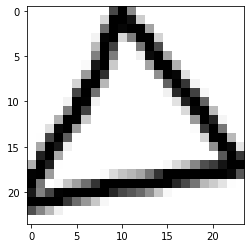

Label:  2.0


In [5]:
plt.imshow(X_test[14], cmap="gray")    # show first number in the dataset
plt.show()
print('Label: ', y_test[14])

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45, 24, 24) (15, 24, 24) (45, 3) (15, 3)


In [7]:
# 4차원으로 변경
X_train =  X_train.reshape(-1, 24,24,1)
X_test =  X_test.reshape(-1, 24,24,1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(45, 24, 24, 1)
(15, 24, 24, 1)
(45, 3)
(15, 3)


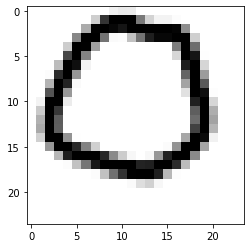

In [8]:
plt.imshow(X_train[2,:,:,0], cmap="gray")  
plt.show()

In [9]:
# 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(24,24,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
    
model.add(Conv2D(64, (3, 3))) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())# 이미지 형태의 데이터를 배열 형태로 만듬

model.add(Dense(128))                     
model.add(Activation('relu'))
model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 22, 22, 32)        320       
_________________________________________________________________
batch_normalization_11 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
activation_16 (Activation)   (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
batch_normalization_12 (Batc (None, 20, 20, 64)        256       
_________________________________________________________________
activation_17 (Activation)   (None, 20, 20, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 64)        0         
__________

In [72]:
# 모델 학습시키기 #1
history = model.fit(X_train, y_train, batch_size = 15, epochs = 100, validation_data =(X_test, y_test), verbose = 0)

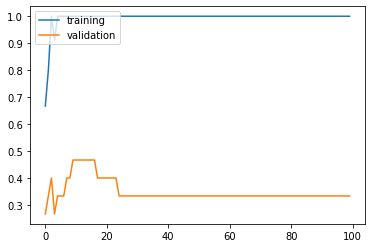

15/15 [==============================] - 0s 998us/step
[7.277196884155273, 0.3333333432674408]


In [73]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
results = model.evaluate(X_test, y_test)
print(results)

In [ ]:
for l in model.layers:
    print(l.name)
    
    

In [74]:
w=model.layers[0].get_weights()
print(w[0].shape)
print(w[1].shape)
# model.layers[0]

print(w[0][:,:,0,0])
print(w[0][:,:,0,1])

(3, 3, 1, 32)
(32,)
[[ 0.0397387   0.12073196 -0.09955796]
 [ 0.01382867 -0.07793991 -0.02482922]
 [ 0.10928013  0.04144115 -0.13175726]]
[[-0.00430884  0.10291364  0.1067344 ]
 [ 0.03493134  0.00688643 -0.11338475]
 [-0.11726195  0.00660031  0.10158647]]


In [75]:
model.layers[0].output

<tf.Tensor 'conv2d_11/BiasAdd:0' shape=(?, 22, 22, 32) dtype=float32>

In [80]:
from keras.models import Model

my_layer_model=Model(inputs=model.input,outputs=model.get_layer("dense_12").output)
output=my_layer_model.predict(X_test)

print(output.shape)

p=np.argmax(output,axis=1)
t=np.argmax(y_test,axis=1)
print(p)
print(t)
print(sum(p==t))

(15, 3)
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
5


(15, 22, 22, 32)


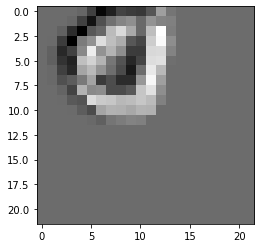

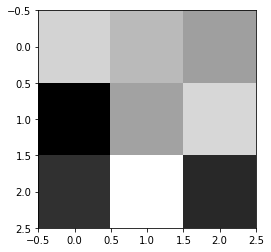

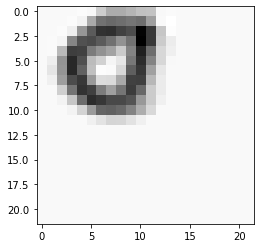

In [56]:
#1번이미지
plt.imshow(output[1,:,:,0], cmap="gray")
plt.show()
#filter
w=model.layers[0].get_weights()
w=w[0]
f=w[:,:,0,5]

plt.imshow(f,cmap="gray")
plt.show()

#출력
plt.imshow(output[1,:,:,5],cmap="gray")
plt.show()

